<img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png">


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The link for dataset - https://www.kaggle.com/uciml/iris

In [1]:
import numpy as np
import random
import pandas as pd
from pandas.tools import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score

import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

import warnings
warnings.filterwarnings('ignore')

Load the dataset in memory using pandas library.

In [2]:
df = pd.read_csv('../input/Iris.csv')
table = ff.create_table(df.head())

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


so there is no null values available in the data set.

 **Visualization of the Dataset**

given the coloums are<br>
SepalLengthCm<br>
SepalWidthCm<br>
PetalLengthCm<br>
PetalWidthCm<br>
Species<br>

**Types of Species**

In [5]:
Species = df['Species'].unique()
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So there are three types of species 
Iris-setosa<br/>
Iris-versicolor<br/>
Iris-virginica<br/>

Corelation between features, They seem pretty independent.

In [6]:
corelation = df.corr()
data = [go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                     colorscale='Blackbody',)
          ]
py.iplot(data)

Lets start with some traditional ML.

In [7]:
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As you can see Iris-setosa Iris-versicolor Iris-virginica are converted to 0, 1, 2 respectively.
First we are splitting the data set into training data and testing data which is 7:3 ratio. 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**List of algorithms**

Since it is a classification problem we will be using<br>
Logistic regression<br>
Decision tree<br>
KNN<br>
SVM<br>
Naive Bayes Classification<br>
Random forest<br>
GBM<br>
LigthGBM<br>

**Logistic regression**

In [11]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)
print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  1.0


**SVM**

In [12]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)
print('SVM - ',accuracy_score(lr_predict,y_test))

SVM -  1.0


**Naive Bayes Classifier**

In [13]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)
print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  1.0


**Decision Tree**

In [14]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)
print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9666666666666667


**Random Forest Classifier**

In [15]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)
print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  1.0


**Extra Trees Classifier**

In [16]:
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)
print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

Extra Tree Classifier -  0.9666666666666667


**KNN**

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print('knn - ',accuracy_score(knn_predict,y_test))

knn -  1.0


**Deep Learning**

Best place to understand deep learning.
Please follow the blog
https://machinelearningmastery.com/what-is-deep-learning/

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [19]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X = StandardScaler().fit_transform(X)
y = LabelBinarizer().fit_transform(y)

Spliting the data into train - 80% and test - 20%

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Deep learning**

In [21]:
deep_model = Sequential()
deep_model.add(Dense( 4, input_dim=4, activation = 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 100, activation= 'relu'))
deep_model.add(Dense( units = 3, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [22]:
deep_history = deep_model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 1s 12ms/step - loss: 1.0881 - acc: 0.4417 - val_loss: 1.0510 - val_acc: 0.7000
Epoch 2/100
120/120 [==============================] - 0s 292us/step - loss: 1.0290 - acc: 0.6583 - val_loss: 0.9233 - val_acc: 0.7000
Epoch 3/100
120/120 [==============================] - 0s 297us/step - loss: 0.8841 - acc: 0.6583 - val_loss: 0.7049 - val_acc: 0.7000
Epoch 4/100
120/120 [==============================] - 0s 281us/step - loss: 0.6811 - acc: 0.6583 - val_loss: 0.4937 - val_acc: 0.7000
Epoch 5/100
120/120 [==============================] - 0s 287us/step - loss: 0.4879 - acc: 0.7083 - val_loss: 0.3887 - val_acc: 0.8333
Epoch 6/100
120/120 [==============================] - 0s 283us/step - loss: 0.4193 - acc: 0.8750 - val_loss: 0.3284 - val_acc: 0.8333
Epoch 7/100
120/120 [==============================] - 0s 299us/step - loss: 0.3478 - acc: 0.8250 - val_loss: 0.2704 - val_acc: 0.9000
Epoch 8/100

Epoch 61/100
120/120 [==============================] - 0s 289us/step - loss: 0.0645 - acc: 0.9583 - val_loss: 0.0343 - val_acc: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 295us/step - loss: 0.0810 - acc: 0.9750 - val_loss: 0.0418 - val_acc: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 277us/step - loss: 0.0560 - acc: 0.9583 - val_loss: 0.0790 - val_acc: 0.9667
Epoch 64/100
120/120 [==============================] - 0s 287us/step - loss: 0.0703 - acc: 0.9667 - val_loss: 0.0478 - val_acc: 0.9667
Epoch 65/100
120/120 [==============================] - 0s 301us/step - loss: 0.0731 - acc: 0.9667 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 66/100
120/120 [==============================] - 0s 301us/step - loss: 0.0647 - acc: 0.9667 - val_loss: 0.0710 - val_acc: 0.9667
Epoch 67/100
120/120 [==============================] - 0s 307us/step - loss: 0.0698 - acc: 0.9583 - val_loss: 0.0587 - val_acc: 0.9667
Epoch 68/100
120/120 [==========================

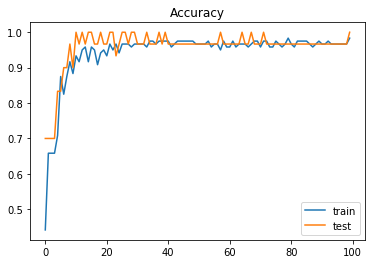

In [23]:
plt.plot(deep_history.history['acc'])
plt.plot(deep_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

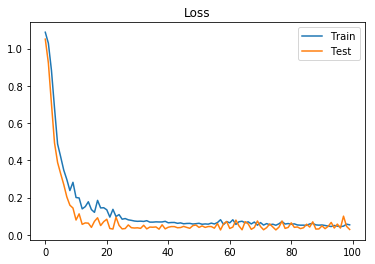

In [25]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()

So our deep model is more accurate than the other models.